# Exercice 3


## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

In [0]:


CA0 = 1.5 # mol/L
CB0 = 2 # mol/L
Vdot=10#L/min
Fao=CA0*Vdot
Fbo=CB0*Vdot
Fco=0
Fdo=0
Feo=0
Ffo=0

## Définir les équations à résoudre

In [0]:
def equations(variables, V,):
    Ca, Cb, Cc,Cd,Ce,Cf = variables
    
    r1=0.25*Ca*Cb
    r2=0.1*Ca*Cd
    r3=5*Cb*Cb*Cc
    
    FA=Ca*Vdot
    FB=Cb*Vdot
    FC=Cc*Vdot
    FD=Cd*Vdot
    FE=Ce*Vdot
    FF=Cf*Vdot
    
    RA = -r1-3*r2
    RB = -2*r1-r3
    RC = r1+r2-2*r3
    RD = r1-2*r2+r3
    RE = r2
    RF = r3
    
    dFAdt = RA
    dFBdt = RB
    dFCdt = RC
    dFDdt = RD
    dFEdt = RE
    dFFdt = RF
   
    return dFAdt, dFBdt, dFCdt, dFDdt, dFEdt, dFFdt,

## Définir les conditions initiales

In [0]:
conditions_initiales = [Fao,Fbo,Fco,Fdo,Feo,Ffo] # mol/min

## Résoudre le problème à l'aide du solveur

In [0]:
V = np.linspace(0, 50, 51) # définir les bornes d'intégration

resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    V, 
)

## Visualiser les résultats

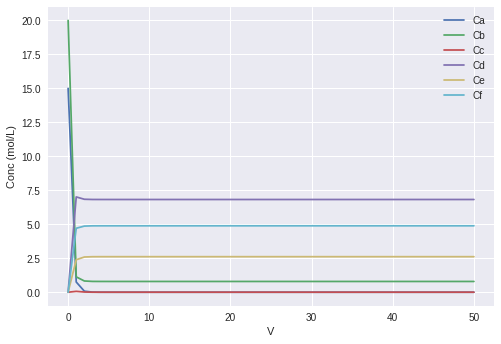

In [38]:
plt.plot(V, resultats)
plt.xlabel('V')
plt.ylabel('Conc (mol/L)')
plt.legend(['Ca','Cb','Cc','Cd','Ce','Cf'])
plt.show()

In [36]:
V[resultats > 0.99][1]

IndexError: ignored